# Приоритизация гипотез и анализ проведённого A/B-теста в отделе маркетинга онлайн-магазина

Вместе с отделом маркетинга крупного интернет-магазина был подготовлен список гипотез для увеличения выручки. Чтобы понять, какие гипотезы нужно тестировать в первую очередь, требуется их приоритизация.
У нас имеется датафрейм с гипотезами и вводными параметрами, для приоритизации я применю популярные фреймворки ICE и RICE, и сравню результаты.

Во второй части ознакомлюсь с результатами проведённого A/B-тестирования и проанализирую их. Даны две таблицы с ежедневной информацией о количестве посетителях из двух обозреваемых групп, а также с инфорация о сделанных ими заказах. Необходимо посмотреть и сравнить показатели конверсии, среднего чека в обоих группах, посмотреть есть ли аномалии в данных, и как они влияют на показатели. Посчитав и сравнив нужные нам метрики, сделаем вывод об успешности или неуспешности внедрения нововведения, либо о продолжении тестировния, если данных будет недостаточно.

# Часть 1

После того как идеи сформированы, их оценивают, чтобы понять, какими именно заниматься в первую очередь. Логично сперва браться за идеи, которые должны принести максимальную отдачу при минимальных усилиях. Можно постараться понять, какие идеи имеют больше шансов на успех.
Существуют разные фреймворки для расстановки приоритетов, например ICE и RICE. Они предполагают составление таблицы с важными для проекта параметрами — возможность отследить основной показатель, влияние, уверенность,  легкость реализации, требуемые усилия.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_colwidth = 400

data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
data.columns = map(str.lower, data.columns)
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В изучаемом файле имеем 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Подбробнее о параметрах:
 - Reach — скольких пользователей затронет изменение;
 - Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
 - Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
 - Efforts — сколько стоит протестировать эту гипотезу. 
 
Применим фреймворк ICE (impact, confidence, effort) для приоритизации гипотез.


In [2]:
data['ICE'] = data['confidence'] * data['impact'] / data['efforts']
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Идеи, набравшие больше всего очков по данному методу - акция со скидкой на день рождения, новые каналы привлечения трафика и новая форма подписки на основные страницы.

Теперь применим фреймворк RICE (reach, impact, confidence и effort) и посмотрим результат. 

In [3]:
data['RICE'] = (data['confidence'] * data['reach'] * data['impact']) / data['efforts']

display(data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Ключевое отличие от ICE скоринга заключается в том, что добавляется элемент «охвата», что меняет общую формулу вычисления. Те гипотезы, на проверку которых более влияет количество посетителей, поднялись выше в таблице приритетов. Идея о добавлении блока рекомендаций товаров поднялась в лидеры, так как затрагивает всех посетителей, просматривающих товары в магазине. А идея с акцией на день рождения закономерно ниже, так как не затрагивает большое количество пользователей в каждый момент времени.

# Часть 2

Был проведён A/B-тест и в результате были получены результаты, которые описаны в файлах orders.csv и visitors.csv. Необходимо проанализировать результаты и сделать вывод, улучшились ли показатели в группе В. Для начала изучим оба файла.

In [4]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
display(orders.head(7))
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


Датасет *orders* содержит:

- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.



In [5]:
display(visitors.head(7))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644


В таблице visitors имеем:

- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

Проверим размеры групп в выборке:

In [6]:
print('Кол-во посетителей в группе А:', visitors[visitors['group']=='A']['visitors'].sum())
print('Кол-во посетителей в группе B:', visitors[visitors['group']=='B']['visitors'].sum())

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916


Теперь проверим количество покупателей из обоих групп, и есть ли те, которые попали в обе группы.

In [7]:
print('Покупателей в группе А:', orders[orders['group']=='A']['visitorId'].nunique())
print('Покупателей в группе B:', orders[orders['group']=='B']['visitorId'].nunique())
ab_users = orders.drop_duplicates(
    subset=['visitorId','group']).groupby(
    'visitorId', as_index=False)['group'].count()
ab_users.columns = ['visitorId', 'groups']
print('Покупатели, попавшие в обе группы:', ab_users[ab_users['groups']==2]['visitorId'].count())

Покупателей в группе А: 503
Покупателей в группе B: 586
Покупатели, попавшие в обе группы: 58


Покупателей, которые по каким-то причинам попали в обе группы, немало. Если мы их уберём, это повлияет на показатели конверсии, так как мы не можем посмотреть и также почистить список всех посетителей (у нас имеется только обезличенное количество). Но всё таки лучше не оставлять этих покупателей в списке, так как это влияет на чистоту А/B-теста.

In [8]:
ab_list = ab_users[ab_users['groups']==2]['visitorId'].tolist()
orders = orders.query('visitorId not in @ab_list')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


## Построение графика кумулятивной выручки по группам

In [9]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
            {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
             'visitorId' : 'nunique', 'revenue' : 'sum'}
             )
        , axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])].agg(
            {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'})
        , axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      23      19   142779       719
1  2019-08-01     B      17      17    59758       713
2  2019-08-02     A      42      36   234381      1338
3  2019-08-02     B      40      39   221801      1294
4  2019-08-03     A      66      60   346854      1845


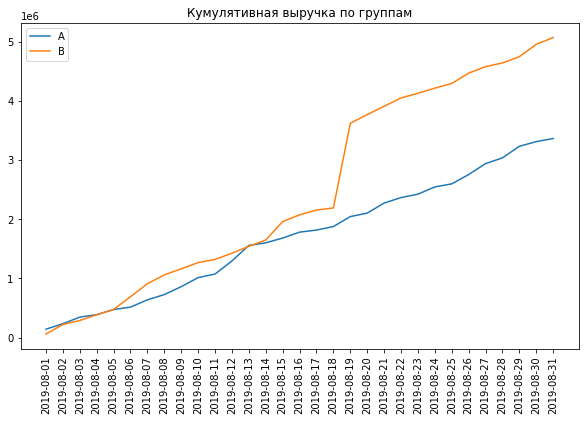

In [10]:
# создаём таблицу с кумулятивным количеством заказов и выручкой по дням группы А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# таблица с кумулятивным количеством заказов и выручкой по дням группы B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,6)) 
# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

График выручки группы A планомерно растёт в течение всего периода. В группе B одном месте мы видим резкий скачок 19 августа. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

## Построение графика среднего чека по группам

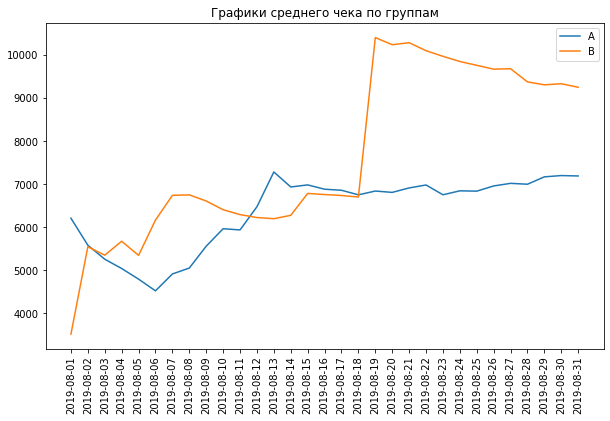

In [11]:
plt.figure(figsize=(10,6))
# разделим кумулятивную выручку на кумулятивное число заказов:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Графики среднего чека по группам')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Вначале графики средних чеков обоих групп плавают примерно в одном диапазоне, но потом мы опять видим резкий скачок в группе В - скорее всего тоже влияние аномалий.

## Построение графика относительного различия для среднего чека

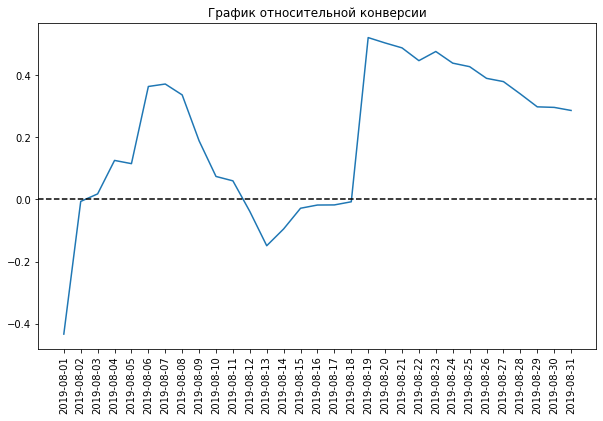

In [12]:
plt.figure(figsize=(10,6))
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/
                                           mergedCumulativeRevenue['ordersB'])/(
                                               mergedCumulativeRevenue['revenueA']/
                                               mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительной конверсии')
plt.xticks(rotation = 90)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Очень большие колебания на графике, относительная конверсия группы В падает ниже группы А только на небольшом участке в середине графика. Потом резкий скачок, который надо изучить.

## Построение графика кумулятивной конверсии по группам

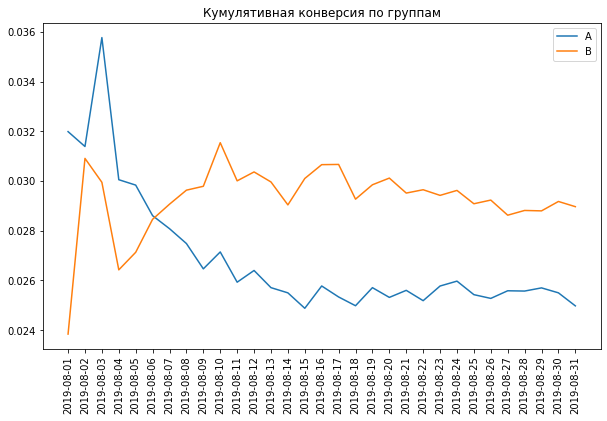

In [13]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,6)) 
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Конверсия группы В явно выше показателя в группе А, она вырастает в первой трети и довольно быстро стабилизируется на этом уровне.

## График относительного изменения кумулятивной конверсии группы B к группе A

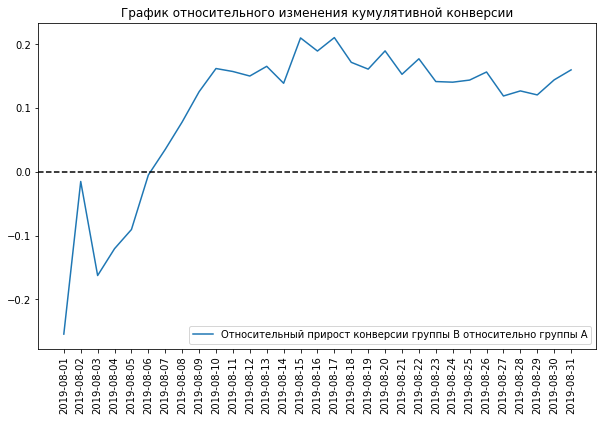

In [14]:
# cоединяем две таблицы для последующего расчёта
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], 
    left_on='date', right_on='date', how='left', 
    suffixes=['A', 'B'])

plt.figure(figsize=(10,6)) 
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('График относительного изменения кумулятивной конверсии')
plt.xticks(rotation = 90)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Посмотрев на оба графика, можно понять, что конверсия группы В выглядит явно лучше группы А. Она вырастает резко уже за первые десять дней, обгоняя группу А и держится на очень хорошем уровне.

## Построение графика количества заказов по пользователям.

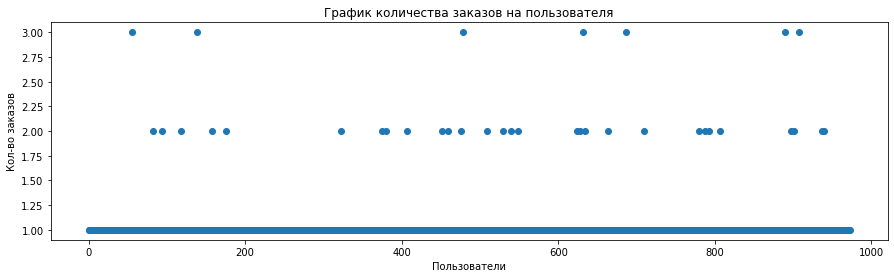

In [15]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,4))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Кол-во заказов')
plt.xlabel('Пользователи')
plt.title('График количества заказов на пользователя')
plt.show()

Большая часть пользователей делает один заказ, два заказа делают немногие, а три заказа - вовсе единицы.
Посчитаем 95 и 99 перцентили количества заказов на пользователя:

In [16]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Здесь разумно будет определить границу для определения аномальных пользователей выше двух заказов на пользователя.

In [17]:
orders_percen = np.percentile(ordersByUsers['orders'], 99)

## График стоимостей заказов пользователей

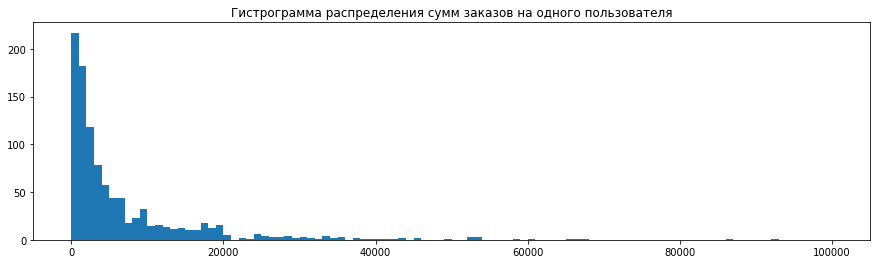

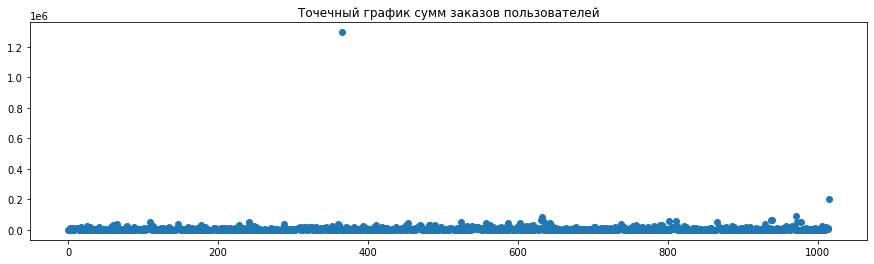

In [18]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()
plt.figure(figsize=(15,4))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график сумм заказов пользователей')
plt.show()

Большая часть заказов - до 20000. Имеется пара выбросов - один из них это очень крупный заказ, который очевидно повлиял на графики выше.

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [19]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 26785 и не более 1% дороже 53904. Границей аномально дорогих заказов выберем 99-й перцентиль.

In [20]:
price_percen = np.percentile(orders['revenue'], 99)

## Статистическая значимость различий между группами по cырым данным.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Прежде всего нужно сформулировать гипотезы. Нулевая гипотеза - различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [21]:
#выделяем посетителей из группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#считаем накопленный показатель посетителей на каждую дату в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#выделяем посетителей из группы B
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#считаем накопленный показатель посетителей на каждую дату в группе А
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#выделяем заказы из группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#считаем накопленный показатель заказов на каждую дату в группе А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#выделяем заказы из группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': 'nunique', 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#считаем накопленный показатель заказов на каждую дату в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#соединяем таблицы в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB со столбцами *userId* и *orders*. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 
Далее посчитаем конверсию в группе, а потом выведем относительный прирост конверсии группы B: *конверсия группы B / конверсия группы A - 1*.

In [22]:
#заказы на пользователей группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['visitorId', 'orders']

#заказы на пользователей группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# объявим переменные sampleA и sampleB, в которых пользователям из разных групп 
# будет соответствовать количество заказов
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#проверка критерием Манна-Уитни
#выводим с округлением до трёх знаков после запятой
print('p-value',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост конверсии группы B',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p-value 0.011
Относительный прирост конверсии группы B 0.160


Первое число p-value - 0.011, намного меньше статистически значимого порога 0.05. Это значит мы отвергаем нулевую гипотезу об отсутствии различий в конверсии в двух группах.

Второе число 0.160, это значит относительных прирост конверсии в группе В по отношению к группе А составил 16%.

## Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [23]:
print('P-value', '{0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value 0.829
0.287


Посчитанный средний чек в группе B значительно выше среднего чека группы A, но так как P-value значительно больше 0.05 делаем вывод, что это наблюдаемое различие статитически незначимо.

## Поиск "аномальных" пользователей.

До этого мы определили границы для фильтрования данных от пользователей с аномально крупными заказами - это те, у кого больше 2 заказов, и сумма заказа выше 53904. Найдём общее количество таких пользователей.

In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_percen]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_percen]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > price_percen]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Всего аномальных пользователей - ', abnormalUsers.count()) 

Всего аномальных пользователей -  16


## Статистическая значимость различий в конверсии между группами по очищенным данным. 

In [25]:
# подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
## применим статистический критерий Манна-Уитни к полученным выборкам:

print('P-value', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value 0.007
0.189


P-value практически не изменился, а значит различия между группами есть и в очищенных данных. Относительный прирост конверсии в группе В ещё выше в очищенных данных и составил 18,9 процентов.

## Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным.

In [26]:
print('{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.788
-0.032


Судя по очищенным данным, статистически значимых отличий в размере среднего чека нет, они практически одинаковы.

## Выводы из A/B-теста

На этом можно остановить тест, так как я выявил, что группа В определённо победила. Несмотря на то, что статистически значимого различия по среднему чеку между группами нет, конверсия в группе В значительно выше группы А и по сырым, и по очищенным от аномалий данным. Это подтверждают также графики конверсии обоих групп.